## Linear Regression - Gradient Descent

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

Linear Regression can be calculated directly, but most models can't. They need to "iterate" or "learn" by making guesses, and check how well the model "fits" the data. 

The example below is called **Convex Optimization for Linear Regression**.
The first 4 minutes of this video explains "finding" the best line.
https://www.youtube.com/watch?v=nk2CQITm_eo&fbclid=IwAR13UfJjywwIJA85jfqADf2JIvd3-AszdB2eRLhwXHJOiKQ6XMGv_XHRiXU

Imagine starting with a flat line (parallel with the x axis) and adjusting it slightly, recalclating the accuracy/error/cost, until you've reached the best "fit". 

Most models learn through iteration.

## Import Libaries

In [1]:
# do all of the imports here
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from sklearn import datasets
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division
numpy.random.seed(seed=1)

## Make up some data, this time randomized.

In [2]:
x = numpy.random.uniform(0, 1, 20)
def f(x): return x * 2
noise_variance = 0.2  # Variance of the gaussian noise
noise = numpy.random.randn(x.shape[0]) * noise_variance
data = f(x) + noise

In [3]:
data

array([ 1.06079790e+00,  1.22067073e+00, -3.42568919e-02,  4.29093462e-01,
        3.01954531e-01,  3.01240232e-01,  1.52396587e-01,  9.20066196e-01,
        9.73853093e-01,  1.17813234e+00,  1.01856022e+00,  1.23369343e+00,
        3.84326454e-01,  1.56908099e+00,  1.19757047e-03,  1.44700611e+00,
        6.96277454e-01,  1.03802895e+00,  1.43339337e-01,  2.27161850e-01])

## Plot the data.

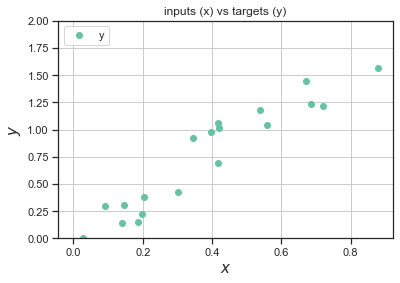

In [4]:
plt.plot(x, data, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()

## Draw a starting line. Not necessarily the best fit, yet.

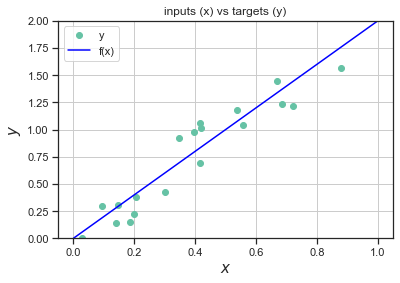

In [11]:
plt.plot(x, data, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()

## Define the cost function

The cost function tells us which way we should adjust  𝑚  and  𝑏 . In Linear Regression, if we range over all possible values for  𝑚  and  𝑏 , we can plot the cost.

Cost functions are sometimes called:\
*loss fuction*\
*objective function*\
*scoring function*\
*error function*

This is because ML is a combination of several disciplines (math, CS, statistics, etc) and they have their own terminology.

The goal is to find a line represented by the values  𝑚  and  𝑏  such that the sum of the vertical distances is minimized, thus, the best "fit" for the data.

In [6]:
def nn(x, w):
    # multiply two variables
    return x * w

# A cost function for Linear Regression.
# cost = Sum of the distance squared between the data point and the line.
# That distance is known as the residual (fancy math term).
def cost(y, t):
    cost = ((t - y)**2).sum()
    return cost

## Calculate the cost/error for many possible lines, and plot it on a graph.

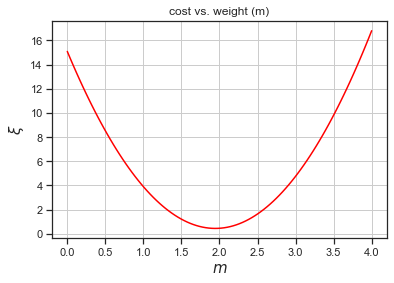

In [7]:
# Plot the cost vs the given weight w (m, in our explanation)
ws = numpy.linspace(0, 4, num=100)  # weight values / 100 tries

# Collect a bunch of costs.
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , data))(ws)  # cost for each weight in ws

# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight (m)')
plt.grid()
plt.show()

This is significant.

Notice that the shape of the cost function creates one large **convext curve**. That makes Linear Regression part of a family of algorithms called **convex optimization functions**.

An important concept!

Note the peaks and valley. Graphing a cost function help you visualize peaks and valleys. 

Linear Regression is easy, one valley. In more complex models, the cost fuction can be very "wavy" (lots of curves and valleys of various depths). In future models, you will try to find the lowest valley without graphing the entire thing -- a technique called "gradient descent", or gradually decending to find the lowest cost, and therefore the best model. With millions of data points, it quickly becomes computationally prohobitive to brute force the best model, so gradient descent is an important tool.

## Gradient Descent

I like to imagine gradient descent while I'm hiking.

Imagine you're standing somewhere on a high mountain. A thick fog rolls in and you can't see further than a few feet. You want to get as low as possible as fast as possible (maybe to find water?), so you decide to follow these steps:

You check your current altitude, your altitude a step north, a step south, a step east, and a step west. Using this, you figure out which direction you should step to reduce your altitude as much as possible in this step.

Repeat until stepping in any direction will cause you to go up again.

Applied to our cost function, the gradient descent algorithm begins with some random initial point, computes the cost function, then computes a gradient step by determining the slope of where the initial point is, then goes in the desired direction; in our case, down towards a minimum.

Remember when you thought you'd never use calculus? How do you find the direction and steepness of a slope? A derivative. 

## Define functions for gradient descent.

In [10]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    # Gradient descent uses a derivative to figure out
    # both the steepness of the slope, and the direction.
    # Yay Calculus!
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.05

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 10  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), data))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, data, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    w_cost.append((w, cost(nn(x, w), data)))  # Add weight, cost to list

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('m({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

m(0): 0.1000 	 cost: 13.6197
m(1): 0.8139 	 cost: 5.3998
m(2): 1.2515 	 cost: 2.3107
m(3): 1.5197 	 cost: 1.1499
m(4): 1.6842 	 cost: 0.7136
m(5): 1.7850 	 cost: 0.5497
m(6): 1.8468 	 cost: 0.4880
m(7): 1.8847 	 cost: 0.4649
m(8): 1.9079 	 cost: 0.4562
m(9): 1.9222 	 cost: 0.4529
m(10): 1.9309 	 cost: 0.4517


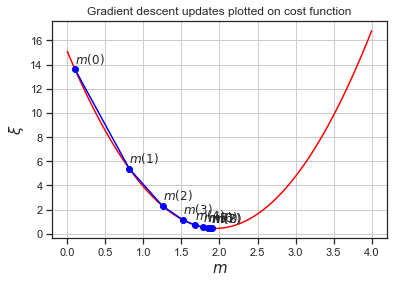

In [19]:
# Plot the first gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$m({})$'.format(i)) 
# Show figure
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

## Visual Approximation of Gradient Descent...

![Image](https://miro.medium.com/max/960/1*imhEKEpzX24CC_LIIureBw.gif)

Note how the line adjusts with each iteration, until it "finds" the best "fit". 

Each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

Also note how changes at the beginning are large, then get smaller as it hones in, or gets to the "bottom" of the cost curve.